# time series analysis

### 00 | setting up

In [149]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [123]:
path = r'/Users/johntam/cf_data_analysis/tasks/A6/code'

tourists = pd.read_csv(os.path.join(path,'tour_ce_omr.tsv'), delimiter='\t')

In [124]:
tourists[['drop', 'drop2','month','unit','country']] = tourists['indic_to,c_resid,month,unit,geo\\time'].str.split(',', expand=True)


In [109]:
tourists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 3739
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   2022     1170 non-null   object
 1   2021     1170 non-null   object
 2   2020     1170 non-null   object
 3   2019     1170 non-null   object
 4   2018     1170 non-null   object
 5   month    1170 non-null   object
 6   country  1170 non-null   object
dtypes: object(7)
memory usage: 73.1+ KB


In [115]:
tourists.sample(20)

,"indic_to,c_resid,month,unit,geo\time",2022,2021,2020,2019,2018,drop,drop2,month,unit,country
3547,"STY,TOTAL,M07,NR,PT",297958,158476,104086,301749,272589,STY,TOTAL,M07,NR,PT
962,"LSTY,TOTAL,M05,NR,BG",72902,44564,12894,54894,49270,LSTY,TOTAL,M05,NR,BG
1426,"NGT_SP,DOM,M06,NR,IT",2253979,1818390,869997,1929725,1723027,NGT_SP,DOM,M06,NR,IT
2181,"NGT_SP,TOTAL,M04,NR,CZ",433920,51601,39260,796019,629890,NGT_SP,TOTAL,M04,NR,CZ
3217,"STY,FOR,M10,NR,IS",22494,17015,942,24539,32918,STY,FOR,M10,NR,IS
2726,"STY,DOM,M08,NR,DE",316731,338906,357305,283864,215906,STY,DOM,M08,NR,DE
2668,"STY,DOM,M06,NR,FI",29502,29441,20688,20478,15321,STY,DOM,M06,NR,FI
879,"LSTY,TOTAL,M02,NR,HU",126498,30759,200894,149301,123241,LSTY,TOTAL,M02,NR,HU
2527,"STY,DOM,M01,NR,SK",7242,2107,7903,5672,3961,STY,DOM,M01,NR,SK
1127,"LSTY,TOTAL,M10,NR,DK",126707,120468,87933,120799,113255,LSTY,TOTAL,M10,NR,DK


### 01 | preparing data

In [111]:
# checking for duplicates
tourists.duplicated().sum()

0

In [112]:
# checking for nans
tourists.isna().sum()

2022       0
2021       0
2020       0
2019       0
2018       0
month      0
country    0
dtype: int64

In [125]:
tourists = tourists.drop(['indic_to,c_resid,month,unit,geo\\time','drop','drop2','unit'], axis = 1)

In [126]:
# creating a dictionary to replace month and country data

months = {'M01':1,'M02':2,'M03':3,'M04':4,'M05':5,'M06':6,'M07':7,'M08':8,'M09':9,'M10':10,'M11':11,'M12':12}

countries = {'NL':'Netherlands','UK':'United Kingdom','IT':'Italy','FR':'France','PT':'Portugal','EL':'Greece','HU':'Hungary',
             'AT':'Austria','ES':'Spain','DE':'Germany'}

# replacing values
tourists.month = tourists.month.replace(months)

tourists.country = tourists.country.replace(countries)

# removing countries we don't need
tourists = tourists[tourists['country'].str.len() > 2]


In [127]:
# Melt the year columns into a single 'value' column
tourists = tourists.melt(id_vars=['country', 'month'], var_name='year', value_name='value')

# Extract the year from the 'year' column and convert to int
tourists['year'] = tourists['year'].astype(str).str.extract('(\d{4})')

# Reorder the columns
tourists = tourists[['country', 'month', 'year', 'value']]


In [119]:
tourists.tail(10)

,country,month,year,value
5840,Austria,TOTAL,2018,1046803
5841,Germany,TOTAL,2018,3303604
5842,Greece,TOTAL,2018,1682528
5843,Spain,TOTAL,2018,6849568
5844,EU27_2020,TOTAL,2018,39627025
5845,France,TOTAL,2018,7694820
5846,Hungary,TOTAL,2018,859012
5847,Italy,TOTAL,2018,5947954
5848,Netherlands,TOTAL,2018,924744
5849,Portugal,TOTAL,2018,2083312


In [128]:
# removing the totals at the bottom and the eu total year values

tourists = tourists[(tourists.month != 'TOTAL')]

In [129]:
# combining year and month to create a datetime col

tourists['date'] = tourists.apply(lambda row: pd.to_datetime(str(row['year'] + '-' + str(row['month']))),axis = 1)

In [130]:
# dropping month and year column
tourists = tourists.drop(['month','year'], axis = 1)

tourists.head()

,country,value,date
0,Austria,38609,2022-01-01
1,Germany,495373,2022-01-01
2,Greece,74586,2022-01-01
3,Spain,504947,2022-01-01
4,EU27_2020,3756064,2022-01-01


In [145]:
# creating graphing dataframe that sums data together 
tourists['value'] = pd.to_numeric(tourists['value'])
graph_data = tourists.groupby(['country','date'], as_index=False).sum()

### 02 | plotting data

In [146]:
graph_data

,country,date,value
0,Austria,2018-01-01,3216138
1,Austria,2018-02-01,3984960
2,Austria,2018-03-01,3732482
3,Austria,2018-04-01,1849922
4,Austria,2018-05-01,2146324
...,...,...,...
595,Spain,2022-08-01,49207712
596,Spain,2022-09-01,28388486
597,Spain,2022-10-01,24121220
598,Spain,2022-11-01,16178574


<AxesSubplot: xlabel='date', ylabel='value'>

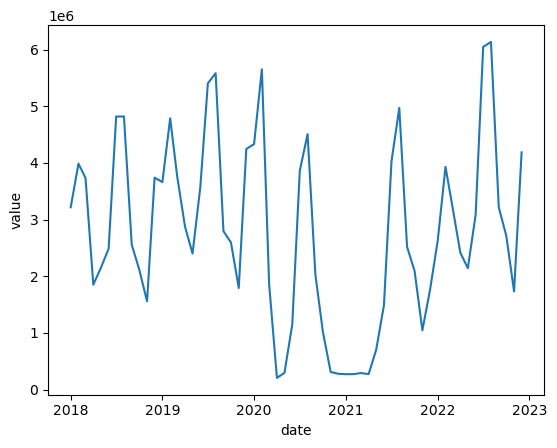

In [147]:
sns.lineplot( x = graph_data[graph_data.country == 'Austria'].date, y = graph_data.value)

<AxesSubplot: xlabel='date', ylabel='value'>

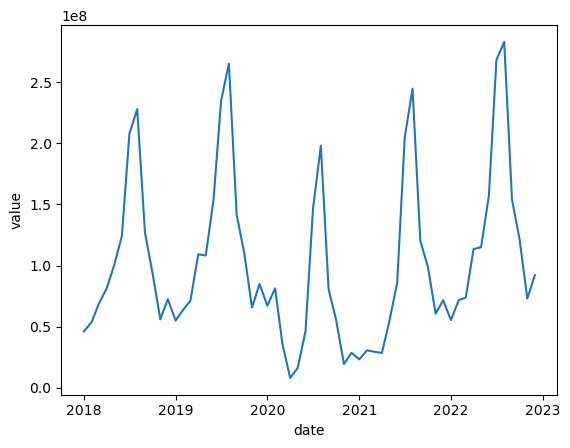

In [148]:
sns.lineplot( x = graph_data[graph_data.country.str.contains('EU')].date, y = graph_data.value)

### 03 | time series analysis - decomposition

In [154]:
# for now we will just be looking at EU as a whole

eu_graph = graph_data[graph_data.country.str.contains('EU')].drop('country',axis=1)

eu_graph = eu_graph.set_index('date')


In [156]:
eu_graph

,value
date,
2018-01-01,46173910
2018-02-01,53956566
2018-03-01,68759008
2018-04-01,81081154
2018-05-01,100112136
2018-06-01,124123860
2018-07-01,207863044
2018-08-01,228028330
2018-09-01,126807958


In [157]:
# running the deconposition

decomposition = sm.tsa.seasonal_decompose(eu_graph, model='additive')

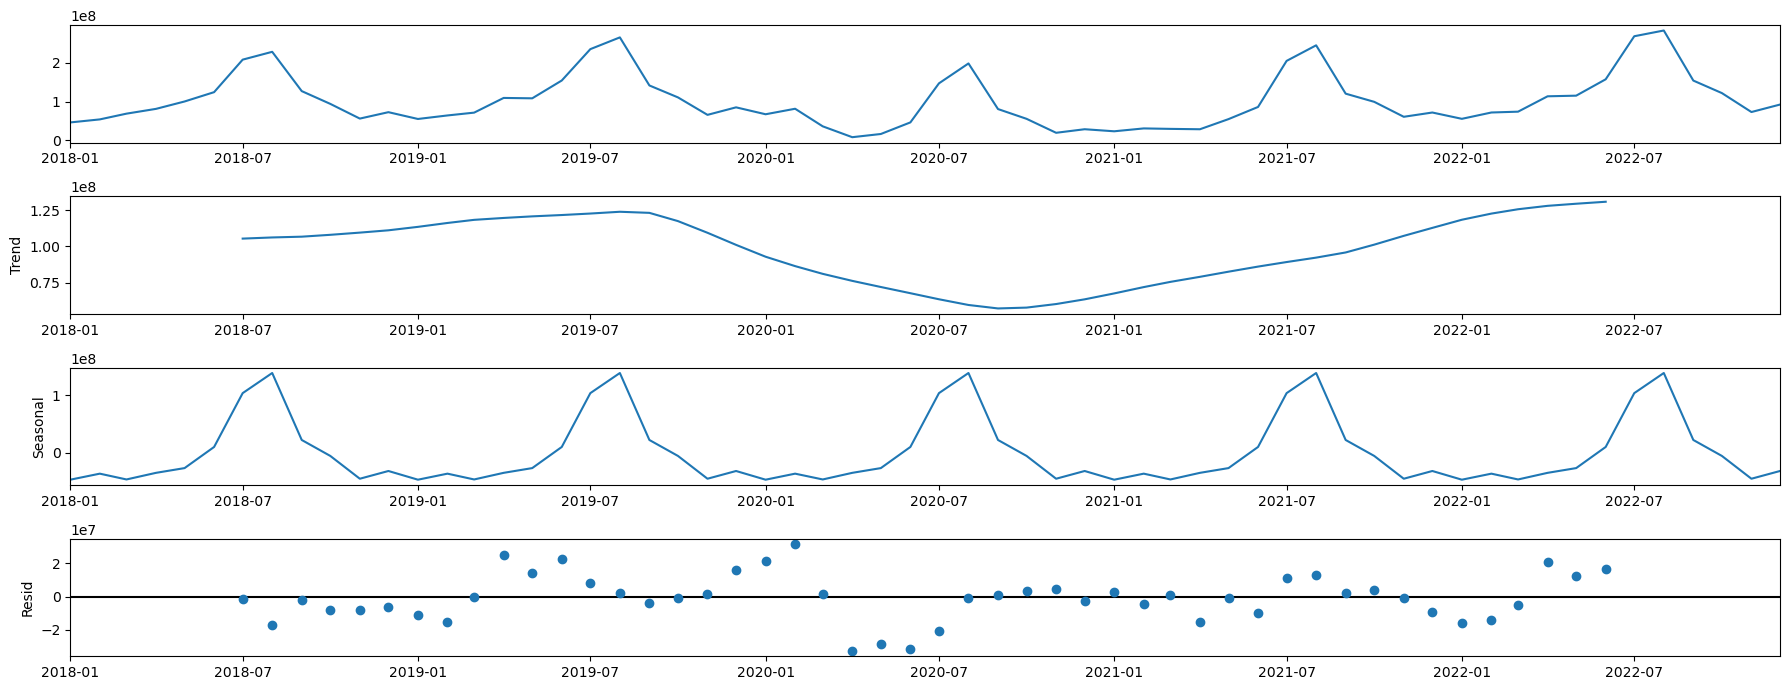

In [162]:
# graphing results 
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

decomposition.plot()
plt.show()

###### we can see a couple things in this decomposition. The first thing to note is the dip in the trend that we can safely assume is due to covid. We can also note that there is a strong seasonality where we see that most people travel to europe in the summer to early fall. Lastly, since it looks like we have a slight upwards trend (excluding the covid years), seasonality and although there is no clear pattern in the residuals, it is not a flat line, we have reason to suspect that the data may not be stationary.   

### 04 | testing for stationarity

In [163]:
# conducting the dickey-fuller stationarity test 

from statsmodels.tsa.stattools import adfuller 

# defining a function to print out the output from the array from adfuller()
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [165]:
# Apply the test using the function on the time series
dickey_fuller(eu_graph['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.231562
p-value                         0.934653
Number of Lags Used            11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


###### from the test we see that we fail to reject the null hypothesis that there is no unit root in our data and therefore it is not stationary

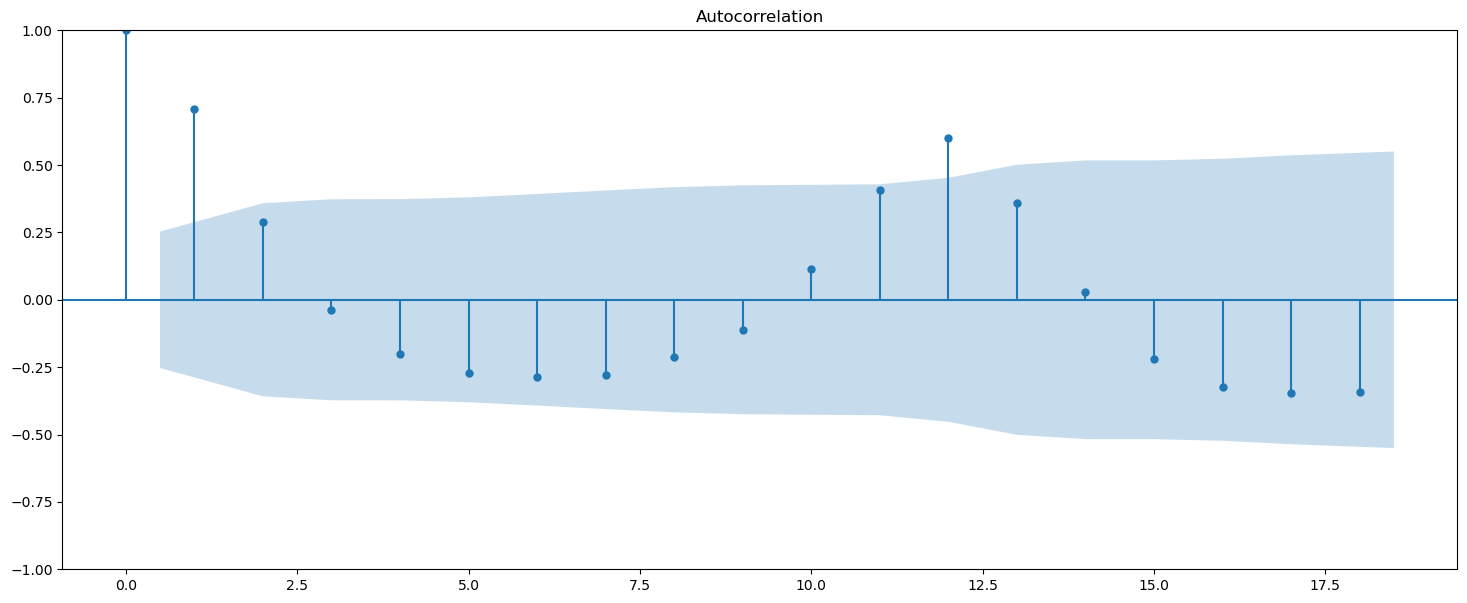

In [167]:
# testing for autocorrelation 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(eu_graph)
plt.show()

###### we see that there are less than ten significant lags, or points outside of the confidence interval. Therefore, we can believe that although our data in non-stationary (as shown by the dickey-fuller test), it is only weakly non-stationary

### 05 | stationarizing the data

In [202]:
data_diff = eu_graph - eu_graph.shift(11) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [204]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

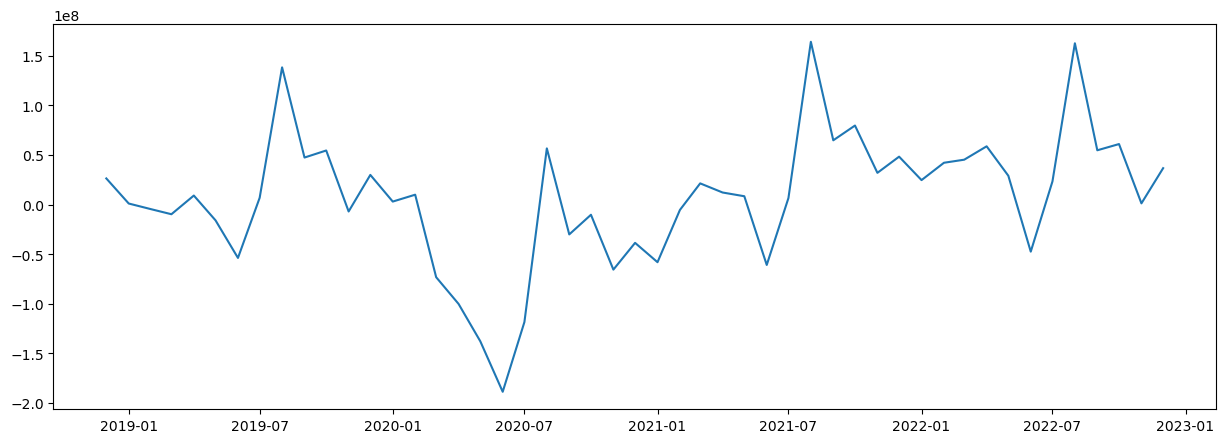

In [205]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [206]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.680596
p-value                         0.004395
Number of Lags Used             0.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


###### it seems with a lag of 11, we were able to remove the seasonal pattern from the data. 

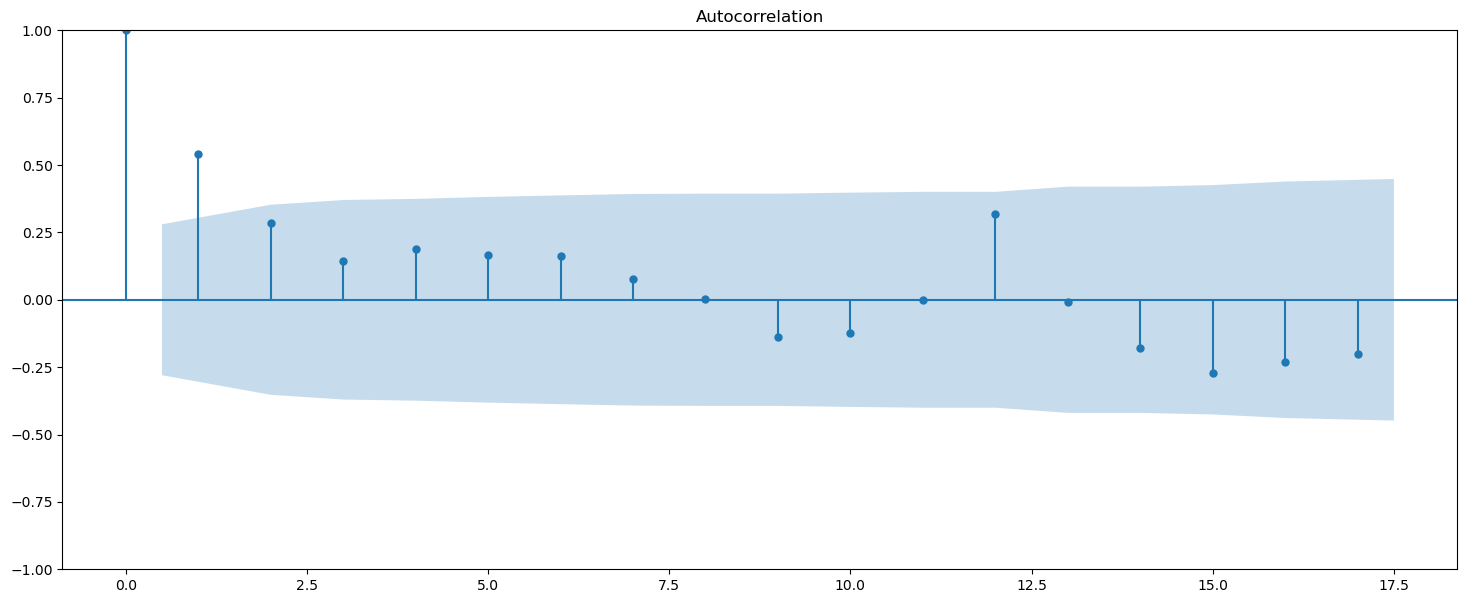

In [207]:
plot_acf(data_diff)
plt.show()